# Rewrite

In [1]:
from lambeq.backend.grammar import Cup, Diagram, Id, Word
from lambeq.backend.drawing import draw

from lambeq import AtomicType

N = AtomicType.NOUN
S = AtomicType.SENTENCE

In [2]:
from lambeq import Rewriter

rewriter = Rewriter()

### Auxiliary rule

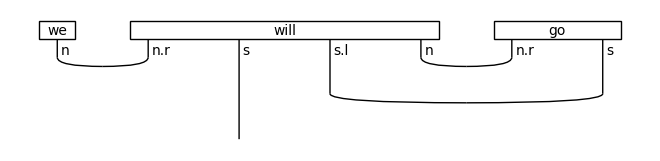

↓ rewriting (auxiliary rule)


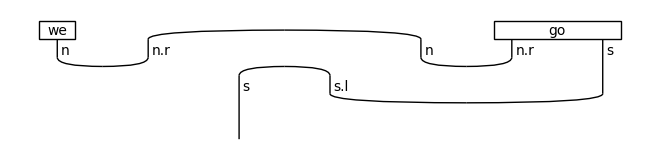

↓ normal form


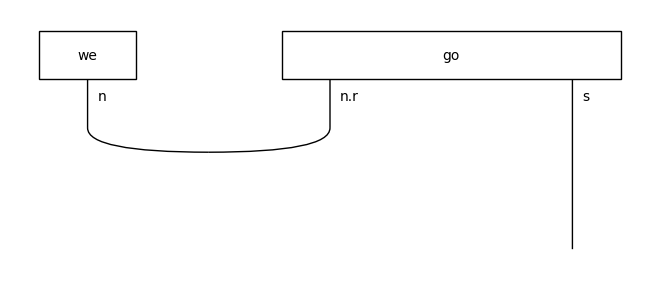

In [3]:
diagram = ((Word('we', N) @ Word('will', (N >> S) << (N >> S)) @
            Word('go', N >> S)) >>
           Cup(N, N.r) @ Id(S) @ Diagram.cups((N >> S).l, N >> S))

draw(diagram)
print('↓ rewriting (auxiliary rule)')
draw(Rewriter(['auxiliary'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Connector rule

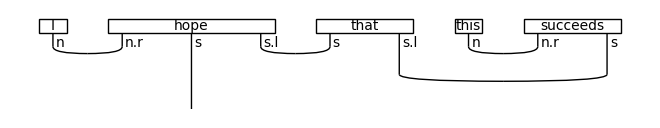

↓ rewriting (connector rule)


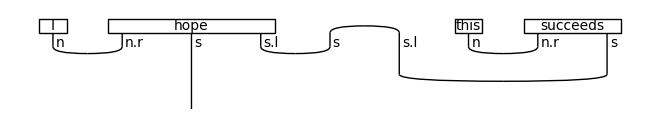

↓ normal form


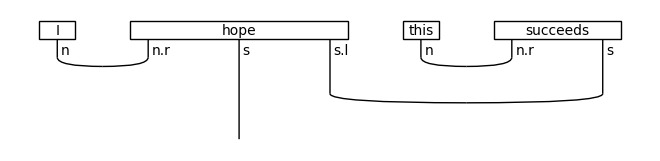

In [4]:
diagram = ((Word('I', N) @ Word('hope', N >> S << S) @
            Word('that', S << S) @ Word('this', N) @
            Word('succeeds', N >> S)) >>
           (Cup(N, N.r) @ Id(S) @ Cup(S.l, S) @
            Diagram.cups((N >> S).l, N >> S)))

draw(diagram)
print('↓ rewriting (connector rule)')
Rewriter(['connector'])(diagram).draw()
print('↓ normal form')
rewriter(diagram).normal_form().draw()

### Determiner rule

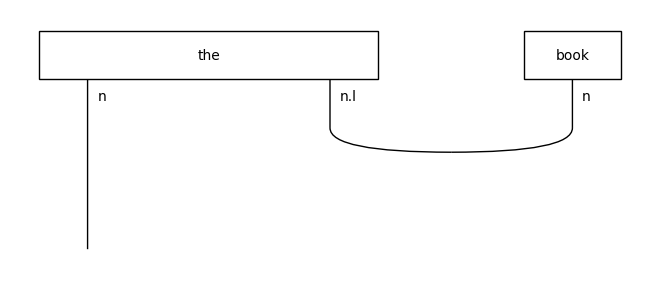

↓ rewriting (determiner rule)


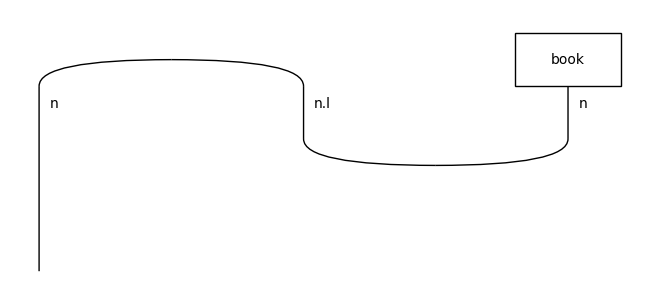

↓ normal form


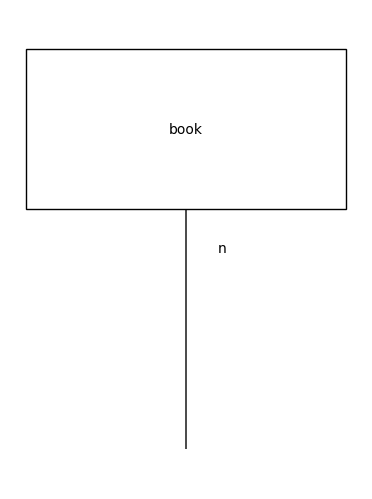

In [5]:
diagram = (Word('the', N << N) @ Word('book', N) >>
           Id(N) @ Cup(N.l, N))

draw(diagram)
print('↓ rewriting (determiner rule)')
draw(Rewriter(['determiner'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Adverb rules

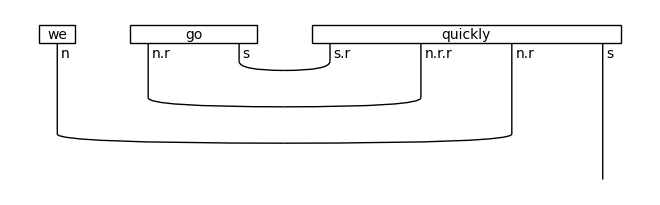

↓ rewriting (postadverb rule)


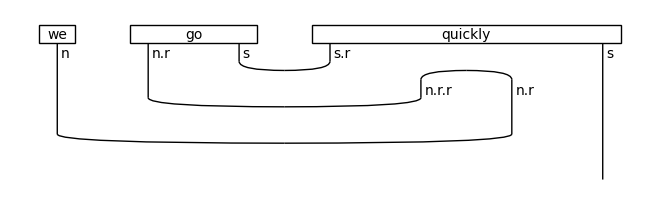

↓ normal form


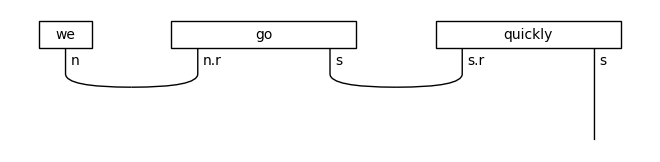

In [7]:
cod = (N >> S) >> (N >> S)
diagram = (Word('we', N) @ Word('go', N >> S) @ Word('quickly', cod) >>
           Diagram.cups(cod[:3].l, cod[:3]) @ Id(S))

draw(diagram)
print('↓ rewriting (postadverb rule)')
draw(Rewriter(['postadverb'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

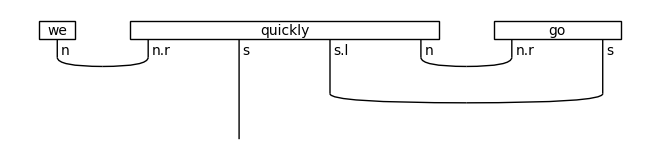

↓ rewriting (preadverb rule)


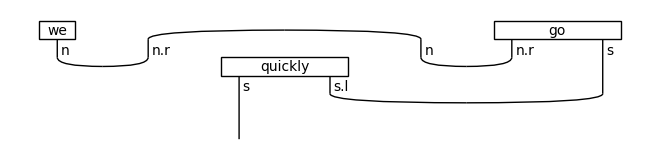

↓ normal form


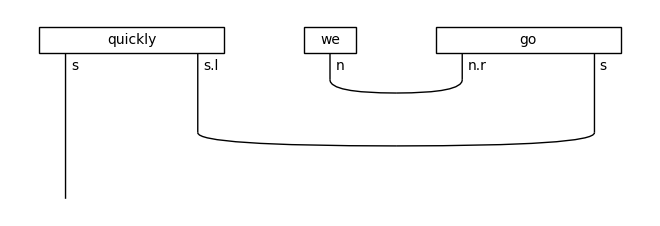

In [8]:
diagram = ((Word('we', N) @ Word('quickly', (N >> S) << (N >> S)) @
            Word('go', N >> S)) >>
           Cup(N, N.r) @ Id(S) @ Diagram.cups((N >> S).l, N >> S))

draw(diagram)
print('↓ rewriting (preadverb rule)')
draw(Rewriter(['preadverb'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Prepositional phrase rule

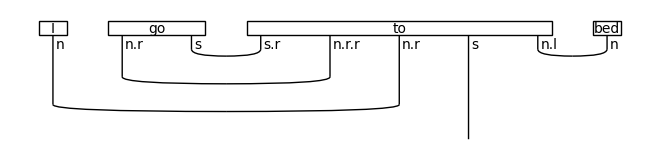

↓ rewriting (prepositional phrase rule)


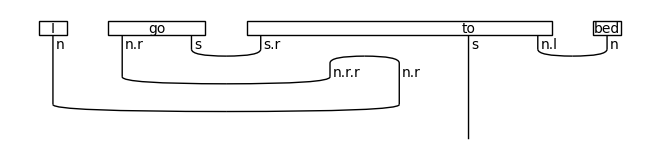

↓ normal form


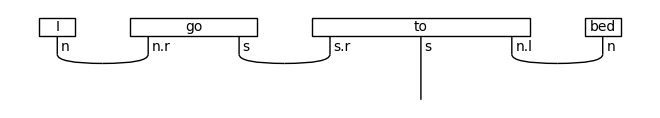

In [9]:
cod = (N >> S) >> (N >> S << N)
diagram = ((Word('I', N) @ Word('go', N >> S) @ Word('to', cod) @
            Word('bed', N)) >>
           Diagram.cups(cod[:3].l, cod[:3]) @ Id(S) @ Cup(N.l, N))

draw(diagram)
print('↓ rewriting (prepositional phrase rule)')
draw(Rewriter(['prepositional_phrase'])(diagram))
print('↓ normal form')
draw(rewriter(diagram).normal_form())

### Relative Pronoun rules

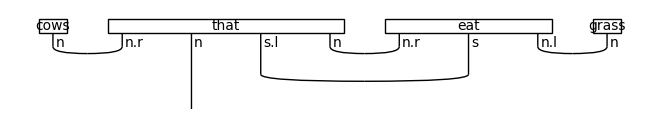

↓ rewriting (subject relative pronoun rule)


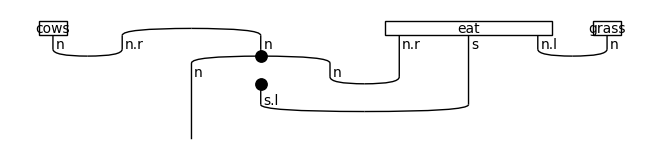

In [10]:
cows = Word('cows', N)
that_subj = Word('that', N.r @ N @ S.l @ N)
that_obj = Word('that', N.r @ N @ N.l.l @ S.l)
eat = Word('eat', N >> S << N)
grass = Word('grass', N)

rewriter = Rewriter(['subject_rel_pronoun'])

diagram = Id().tensor(cows, that_subj, eat, grass)
diagram >>= Cup(N, N.r) @ Id(N) @ Diagram.cups(S.l @ N, N.r @ S) @ Cup(N.l, N)

draw(diagram)
print('↓ rewriting (subject relative pronoun rule)')
draw(Rewriter(['subject_rel_pronoun'])(diagram))

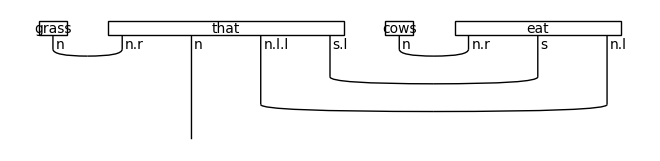

↓ rewriting (object relative pronoun rule)


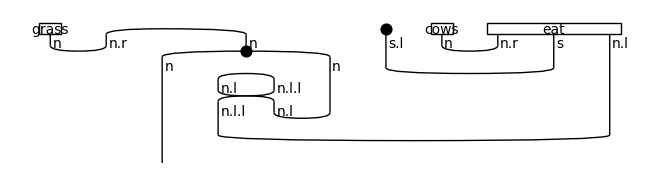

In [11]:
diagram = Id().tensor(grass, that_obj, cows, eat)
diagram >>= Cup(N, N.r) @ Id(N) @ Id(N.l.l @ S.l) @ Cup(N, N.r) @ Id(S @ N.l)
diagram >>= Id(N) @ Diagram.cups(N.l.l @ S.l, S @ N.l)

draw(diagram)
print('↓ rewriting (object relative pronoun rule)')
draw(Rewriter(['object_rel_pronoun'])(diagram))

### Coordination

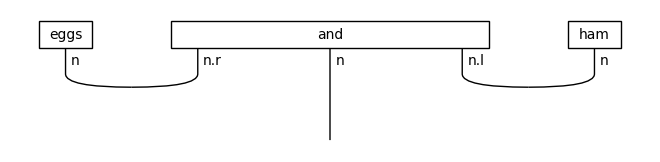

↓ rewriting (coordination rule)


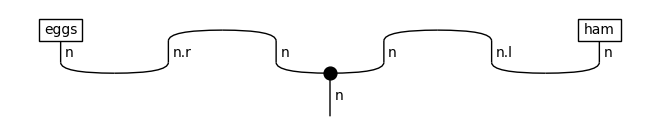

↓ normal form


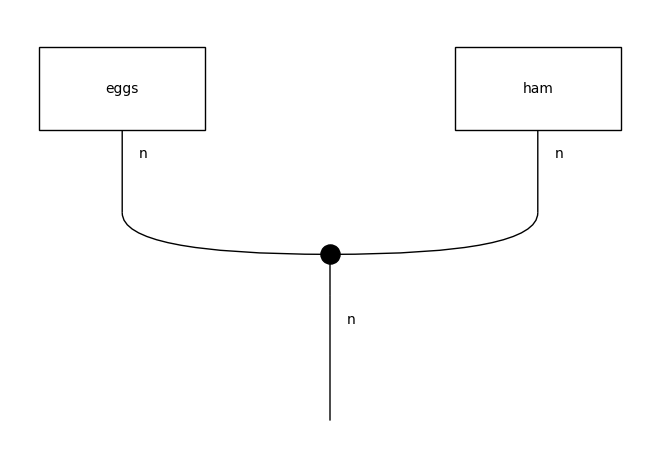

In [12]:
diagram = (Word('eggs', N) @ Word('and', N >> N << N)
           @ Word('ham', N) >> Cup(N, N.r) @ Id(N) @ Cup(N.l, N))

draw(diagram)
print('↓ rewriting (coordination rule)')
draw(Rewriter(['coordination'])(diagram))
print('↓ normal form')
draw(Rewriter(['coordination'])(diagram).normal_form())

### Remove cups

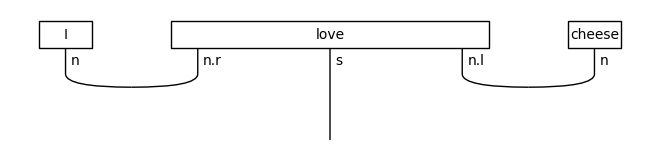

↓ remove cups by bending wires


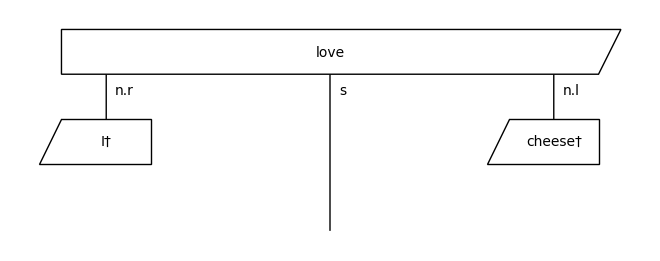

In [13]:
from lambeq import RemoveCupsRewriter


diagram = (Word('I', N) @ Word('love', N >> S << N)
           @ Word('cheese', N) >> Cup(N, N.r) @ Id(S) @ Cup(N.l, N))
remove_cups = RemoveCupsRewriter()

draw(diagram)
print('↓ remove cups by bending wires')
remove_cups(diagram).draw()

### Curry functor

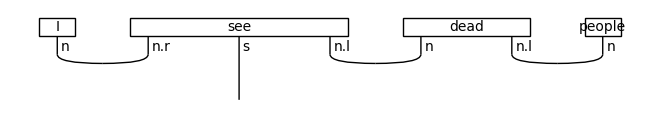

↓ rewrite by using the map-state duality


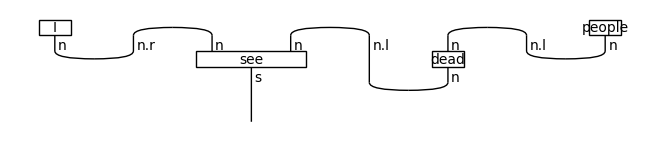

↓ normal form


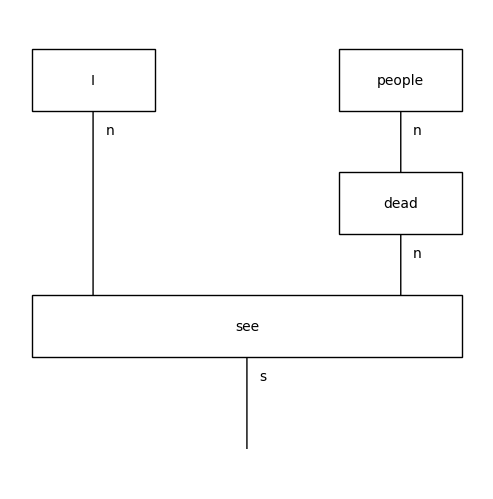

In [14]:
rewriter = Rewriter(['curry'])

diagram = (
    Word('I', N) @ Word('see', N >> S << N) @
    Word('dead', N @ N.l) @ Word('people', N) >>
    Cup(N, N.r) @ Id(S) @ Cup(N.l, N) @ Cup(N.l, N)
)
draw(diagram)
print('↓ rewrite by using the map-state duality')
rewriter(diagram).draw()
print('↓ normal form')
rewriter(diagram).normal_form().draw()